In [1]:
# Importo librerias.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Para ignorar los warnings.

import warnings
warnings.filterwarnings('ignore')

In [2]:
pwd

'c:\\Users\\mur_9\\OneDrive\\Documentos\\Code\\clusterai\\cv\\EDA appstore'

In [3]:
google_df = pd.read_csv(r"C:\Users\mur_9\OneDrive\Documentos\Code\clusterai\cv\EDA appstore\googleplaystore.csv")

In [4]:
# Veo cuantas Filas/Columnas tengo.

filas = np.shape(google_df)[0]
print(f'filas: {filas}')
columnas = np.shape(google_df)[1]
print(f'columnas: {columnas}')

google_df.head()

filas: 10841
columnas: 13


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
# Ingreso los valores de las columnas de google_df en una variable.
nombre_columnas = google_df.columns.values

Duplicados

In [6]:
# Elimino duplicados.
google_df.drop_duplicates(subset='App', inplace=True,keep='first')
filas = np.shape(google_df)[0]
print(f'filas: {filas}')

filas: 9660


In [7]:
# Ingreso en q_installs el valor correspondiente a la cantidad de valores unicos en la columna Installs.
q_installs = len(google_df['Installs'].unique())
print(f'cantidad de valores en intalls que son {q_installs} unicos')
print("\n\n", google_df['Installs'].unique())

cantidad de valores en intalls que son 22 unicos


 ['10,000+' '500,000+' '5,000,000+' '50,000,000+' '100,000+' '50,000+'
 '1,000,000+' '10,000,000+' '5,000+' '100,000,000+' '1,000,000,000+'
 '1,000+' '500,000,000+' '50+' '100+' '500+' '10+' '1+' '5+' '0+' '0'
 'Free']


In [8]:
# Saco las filas de Installs que son 'Free'.
google_df = google_df[google_df['Installs'] != 'Free']
filas = np.shape(google_df)[0]
print(f'me quedan un total de {filas}')

me quedan un total de 9659


In [9]:
# Reemplaamos los caraccteres '+' y ','.
google_df['Installs'] = google_df ['Installs'].str.replace(',','')
google_df['Installs'] = google_df ['Installs'].str.replace('+','')


In [10]:
# Cambio formato a int
google_df = google_df.astype({"Installs": int})

In [11]:
q_installs = len(google_df['Installs'].unique())
print(f'hay un total de {q_installs} valores unicos en la columna')
print('\n\n',google_df['Size'].unique())

hay un total de 20 valores unicos en la columna


 ['19M' '14M' '8.7M' '25M' '2.8M' '5.6M' '29M' '33M' '3.1M' '28M' '12M'
 '20M' '21M' '37M' '2.7M' '5.5M' '17M' '39M' '31M' '4.2M' '7.0M' '23M'
 '6.0M' '6.1M' '4.6M' '9.2M' '5.2M' '11M' '24M' 'Varies with device'
 '9.4M' '15M' '10M' '1.2M' '26M' '8.0M' '7.9M' '56M' '57M' '35M' '54M'
 '201k' '3.6M' '5.7M' '8.6M' '2.4M' '27M' '2.5M' '16M' '3.4M' '8.9M'
 '3.9M' '2.9M' '38M' '32M' '5.4M' '18M' '1.1M' '2.2M' '4.5M' '9.8M' '52M'
 '9.0M' '6.7M' '30M' '2.6M' '7.1M' '3.7M' '22M' '7.4M' '6.4M' '3.2M'
 '8.2M' '9.9M' '4.9M' '9.5M' '5.0M' '5.9M' '13M' '73M' '6.8M' '3.5M'
 '4.0M' '2.3M' '7.2M' '2.1M' '42M' '7.3M' '9.1M' '55M' '23k' '6.5M' '1.5M'
 '7.5M' '51M' '41M' '48M' '8.5M' '46M' '8.3M' '4.3M' '4.7M' '3.3M' '40M'
 '7.8M' '8.8M' '6.6M' '5.1M' '61M' '66M' '79k' '8.4M' '118k' '44M' '695k'
 '1.6M' '6.2M' '18k' '53M' '1.4M' '3.0M' '5.8M' '3.8M' '9.6M' '45M' '63M'
 '49M' '77M' '4.4M' '4.8M' '70M' '6.9M' '9.3M' '10.0M' '8.1M' '36M' '84M'
 '97M' '2.0M' '1

google_df['Size'] = google_df['Size'].str.replace('k','')
google_df['Size'] = google_df['Size'].str.replace('M','')

In [12]:
q_size = len(google_df['Size'].unique())
print(f'hay un total de {q_size} valores unicos en la columna Size')
print('\n\n',google_df['Size'].unique())

hay un total de 461 valores unicos en la columna Size


 ['19M' '14M' '8.7M' '25M' '2.8M' '5.6M' '29M' '33M' '3.1M' '28M' '12M'
 '20M' '21M' '37M' '2.7M' '5.5M' '17M' '39M' '31M' '4.2M' '7.0M' '23M'
 '6.0M' '6.1M' '4.6M' '9.2M' '5.2M' '11M' '24M' 'Varies with device'
 '9.4M' '15M' '10M' '1.2M' '26M' '8.0M' '7.9M' '56M' '57M' '35M' '54M'
 '201k' '3.6M' '5.7M' '8.6M' '2.4M' '27M' '2.5M' '16M' '3.4M' '8.9M'
 '3.9M' '2.9M' '38M' '32M' '5.4M' '18M' '1.1M' '2.2M' '4.5M' '9.8M' '52M'
 '9.0M' '6.7M' '30M' '2.6M' '7.1M' '3.7M' '22M' '7.4M' '6.4M' '3.2M'
 '8.2M' '9.9M' '4.9M' '9.5M' '5.0M' '5.9M' '13M' '73M' '6.8M' '3.5M'
 '4.0M' '2.3M' '7.2M' '2.1M' '42M' '7.3M' '9.1M' '55M' '23k' '6.5M' '1.5M'
 '7.5M' '51M' '41M' '48M' '8.5M' '46M' '8.3M' '4.3M' '4.7M' '3.3M' '40M'
 '7.8M' '8.8M' '6.6M' '5.1M' '61M' '66M' '79k' '8.4M' '118k' '44M' '695k'
 '1.6M' '6.2M' '18k' '53M' '1.4M' '3.0M' '5.8M' '3.8M' '9.6M' '45M' '63M'
 '49M' '77M' '4.4M' '4.8M' '70M' '6.9M' '9.3M' '10.0M' '8.1M' '36M' '84M'
 '97M' '2.

In [13]:
google_df['Size'] = google_df['Size'].replace('Varies with device',np.nan)

In [14]:
# Eliminamos las letras k y M que estan al final de cada valor.
output = google_df.Size.replace(r'[kM]','',regex=True).astype(float)
print(output, '\r\n')
print(output.value_counts())

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10836    53.0
10837     3.6
10838     9.5
10839     NaN
10840    19.0
Name: Size, Length: 9659, dtype: float64 

11.0     183
12.0     181
14.0     178
13.0     177
15.0     163
        ... 
430.0      1
429.0      1
200.0      1
460.0      1
619.0      1
Name: Size, Length: 420, dtype: int64


In [15]:
# Reemplazo los NaN por 1 para no perder registros.
output = google_df.Size.str.extract(r'([kM])', expand=False).fillna(1)
print(output,'\r\n')
print(output.value_counts())

0        M
1        M
2        M
3        M
4        M
        ..
10836    M
10837    M
10838    M
10839    1
10840    M
Name: Size, Length: 9659, dtype: object 

M    8118
1    1227
k     314
Name: Size, dtype: int64


In [16]:
# Homogeneizamos , k = 10**-3 y M = 1
output = google_df.Size.str.extract(r'([kM])',expand=False).fillna(1)\
    .replace(['k','M'],[10**-3,1]).astype(float)
print(output.value_counts())

1.000    9345
0.001     314
Name: Size, dtype: int64


In [17]:
# Junto los pasos anteriores.
google_df.Size = google_df.Size.str.replace(r'([kM])','',regex=True).astype(float) * \
    google_df.Size.str.extract(r'([kM])',expand=False).fillna(1).replace(['k','M'],[10**-3,1]).astype(float)

In [18]:
google_df.Size

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10836    53.0
10837     3.6
10838     9.5
10839     NaN
10840    19.0
Name: Size, Length: 9659, dtype: float64

In [19]:
# Reemplazo valores Nan con la media
google_df['Size'].fillna(google_df.groupby('Genres')['Size'].transform('mean'), inplace = True)

In [20]:
# Paso los tipos a Float.
google_df['Size'] = google_df['Size'].astype(float)
google_df['Installs'] = google_df['Installs'].astype(float)

In [21]:
# Saco el signo '$'.
google_df['Price'] = google_df['Price'].str.replace('$','')
google_df['Price'] = google_df['Price'].astype(float)


In [22]:
# Paso a int.
google_df['Reviews'] = google_df['Reviews'].astype(int)

In [23]:
# Veo que columnas tiene valores nulos.
col_Nan = google_df.isnull().any()
print(col_Nan,'\n')

App               False
Category          False
Rating             True
Reviews           False
Size               True
Installs          False
Type               True
Price             False
Content Rating    False
Genres            False
Last Updated      False
Current Ver        True
Android Ver        True
dtype: bool 



In [24]:
#Reviso cuantos y que porcentaje de nulos tengo.
total = google_df.isnull().sum().sort_values(ascending=False)
percent = (google_df.isnull().sum()/google_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis = 1, keys=['Total','percent'])
missing_data.head(6)

,Total,percent
Rating,1463,0.151465
Current Ver,8,0.000828
Size,3,0.000311
Android Ver,2,0.000207
Type,1,0.000104
App,0,0.000000


In [25]:
# Elimino todos los nulos.
google_df.dropna(how='any',inplace=True)

In [26]:
print(f'nos quedan {google_df.shape[0]} filas por {google_df.shape[1]} columnas')

nos quedan 8187 filas por 13 columnas


Grafos

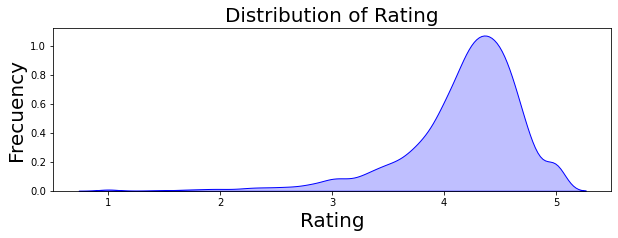

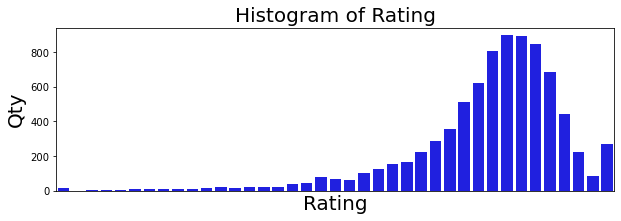

In [27]:
# Distribucion de rating y histograma.
plt.figure(figsize=(10,3))
sns.kdeplot(google_df['Rating'], color= "Blue", shade = True)
plt.xlabel("Rating",size = 20)
plt.ylabel("Frecuency",size = 20)
plt.title('Distribution of Rating',size = 20)
# plt.imsave('KDE',format='png') # Guardar la imagen
plt.show()

plt.figure(figsize=(10,3))
sns.countplot(google_df.Rating, color="Blue")
plt.xlabel("Rating",size = 20)
plt.ylabel("Qty",size = 20)
plt.title('Histogram of Rating',size = 20)
plt.xticks([]) # sacar intervalos en x
#plt.imsave('Histogram',format='png') # Guardar la imagen
plt.show()

In [28]:
q_categorias = google_df['Category'].unique()
print(f'tengo un total de {len(q_categorias)}','\n')
print(q_categorias,'\n')

tengo un total de 33 

['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION'] 



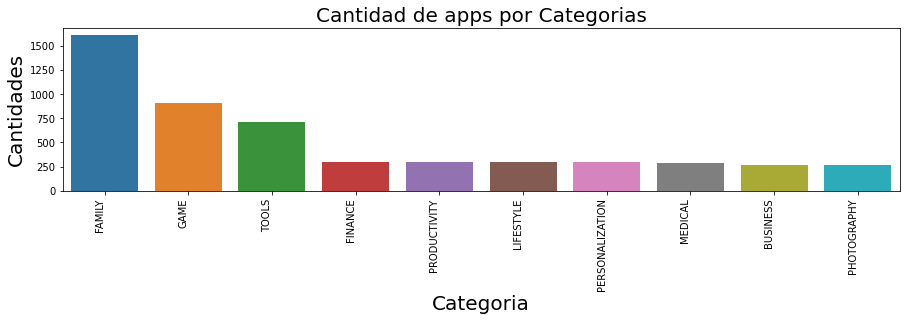

In [30]:
# Visualizo las 10 categorias TOP.
top_n = 10
idx_top = google_df['Category'].value_counts(ascending=False).index[0:top_n]

plt.figure(figsize=(15,3))
g=sns.countplot(x='Category',data=google_df, order=idx_top,)
g.set_xticklabels(g.get_xticklabels(),rotation=90, ha='right')
plt.title('Cantidad de apps por Categorias', size= 20)
plt.xlabel('Categoria', size=20)
plt.ylabel('Cantidades',size=20)
plt.show()



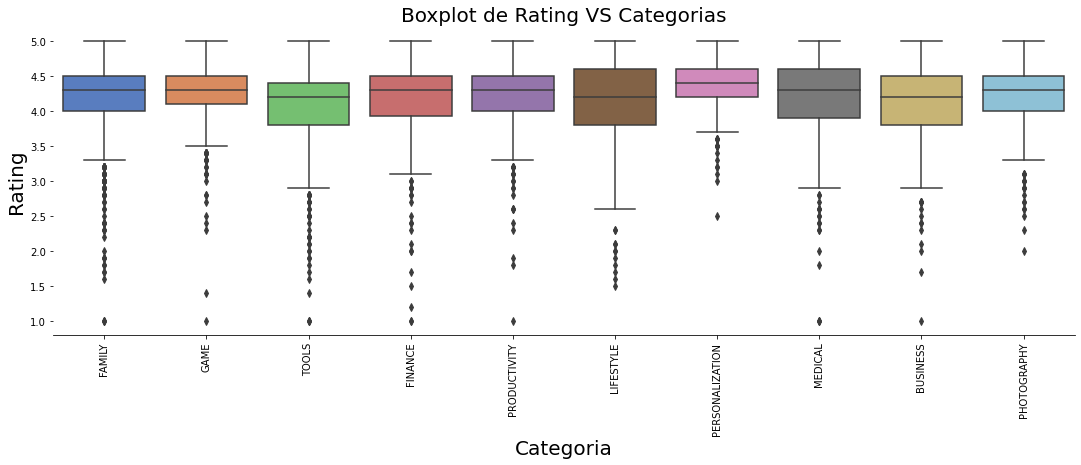

In [31]:
# Veo como se comportan las variables.
g = sns.catplot(x="Category",y="Rating",
                data=google_df, 
                kind="box",
                order=idx_top,
                palette = "muted",
                height = 5 ,aspect=3)

g.despine(left=True,) # Para quitar linea del Y del plot
g.set_xticklabels(rotation=90)
plt.xlabel("Categoria",size = 20)
plt.ylabel("Rating",size = 20)
plt.title('Boxplot de Rating VS Categorias',size = 20)
plt.show()

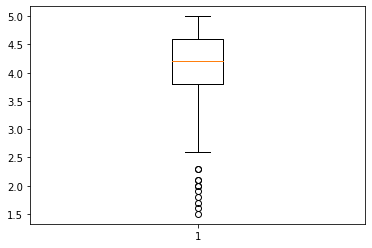

In [32]:
cat_select = 'LIFESTYLE'
df_pivot = google_df[google_df['Category']==cat_select]
plt.figure()
bxplot = plt.boxplot(df_pivot['Rating'])
plt.show()

In [33]:
#  guardo en variables valores como la media, los valores atipicos y los "whiskers" para cada categoria.
medians = bxplot['medians'][0].get_ydata()

low_limits = bxplot['whiskers'][0].get_ydata()
up_limits = bxplot['whiskers'][1].get_ydata()

Q1 = low_limits[0]
Q3 = up_limits[0]

low_whiskers = low_limits[1]
up_whiskers = up_limits[1]

outliers = bxplot['fliers'][0].get_ydata()



In [34]:
print(f'la mediana es {medians[0]}')
print(f'los limites Q1 - Q3 quedan definidos por {Q1} - {Q3}')
print(f'los limites son {low_limits} - {up_limits}','\n')
print(f'los outliers son {outliers}')


la mediana es 4.2
los limites Q1 - Q3 quedan definidos por 3.8 - 4.6
los limites son [3.8 2.6] - [4.6 5. ] 

los outliers son [1.7 1.9 2.3 1.8 1.6 2.  2.  1.5 2.1 2.3 2.1]


Reviews

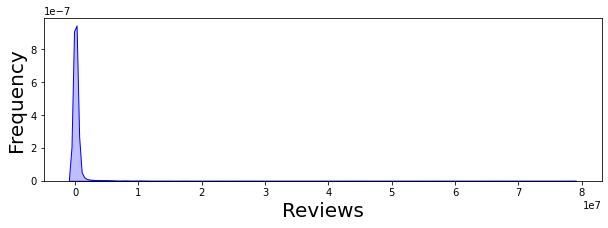

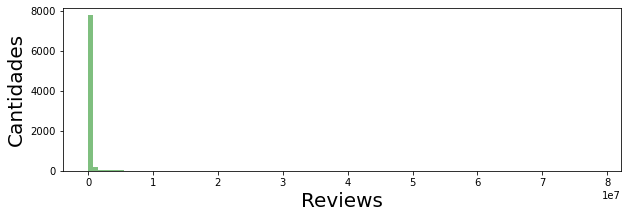

In [35]:
plt.figure(figsize=(10,3))
g = sns.kdeplot(google_df['Reviews'],color='Blue',shade=True)
plt.xlabel('Reviews',size=20)
plt.ylabel('Frequency',size=20)
plt.show()

plt.figure(figsize=(10,3))
plt.hist(google_df['Reviews'],bins=100,color='Green',alpha=0.5)
plt.xlabel('Reviews',size=20)
plt.ylabel('Cantidades',size = 20)
plt.show()

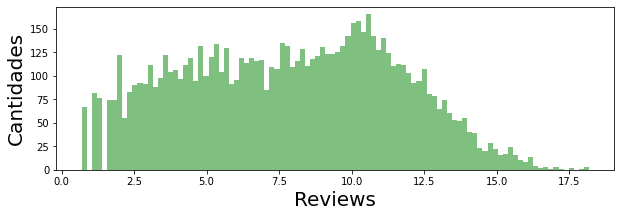

In [36]:
plt.figure(figsize=(10,3))
plt.hist(np.log(1+google_df['Reviews']),bins=100,color='Green',alpha=0.5)
plt.xlabel('Reviews',size=20)
plt.ylabel('Cantidades',size = 20)
plt.show()

In [37]:
google_df[google_df['Reviews']>5000000].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,11.30743,1.000000e+09,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,11.30743,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,11.30743,1.000000e+09,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
342,Viber Messenger,COMMUNICATION,4.3,11334799,11.30743,5.000000e+08,Free,0.0,Everyone,Communication,"July 18, 2018",Varies with device,Varies with device
351,Opera Mini - fast web browser,COMMUNICATION,4.5,5149854,11.30743,1.000000e+08,Free,0.0,Everyone,Communication,"July 19, 2018",Varies with device,Varies with device


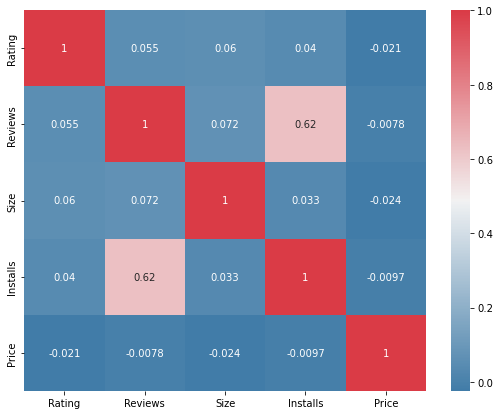

In [38]:
# Reviso si hay correlaciones.
corrmat = google_df.corr()

f, ax= plt.subplots(figsize=(9,7))
ax = sns.heatmap(corrmat,annot=True,cmap=sns.diverging_palette(240,10,as_cmap=True))

In [39]:
google_df.Price.describe()

count    8187.000000
mean        1.038722
std        16.867118
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

In [40]:
google_df[google_df.Price==400]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3,10000.0,Paid,400.0,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up


In [41]:
# Segmento segun los precios.
google_df.loc[google_df['Price']==0,'Banda de precio']='0 Gratis'
google_df.loc[(google_df['Price']>0) & (google_df['Price']<=0.99),'Banda de precio']='1 Muy Barato'
google_df.loc[(google_df['Price']>0.99)&(google_df['Price']<=2.99),'Banda de precio']='2 Barato'
google_df.loc[(google_df['Price']>2.99)&(google_df['Price']<=4.99),'Banda de precio']='3 Normal'
google_df.loc[(google_df.Price>4.99)&(google_df.Price<=14.99),'Banda de precio']='4 Caro '
google_df.loc[(google_df.Price>14.99)&(google_df.Price<=29.99),'Banda de precio']='5 Muy Caro'
google_df.loc[google_df.Price>29.99,'Banda de precio']='6 Una locura'

In [42]:
google_df['Banda de precio'].unique()

array(['0 Gratis', '3 Normal', '4 Caro ', '2 Barato', '1 Muy Barato',
       '5 Muy Caro', '6 Una locura'], dtype=object)

In [43]:
google_df[['Banda de precio','Rating']].groupby('Banda de precio',as_index=False).mean()

,Banda de precio,Rating
0,0 Gratis,4.166394
1,1 Muy Barato,4.300971
2,2 Barato,4.293220
3,3 Normal,4.237838
4,4 Caro,4.235897
5,5 Muy Caro,4.238889
6,6 Una locura,3.910526


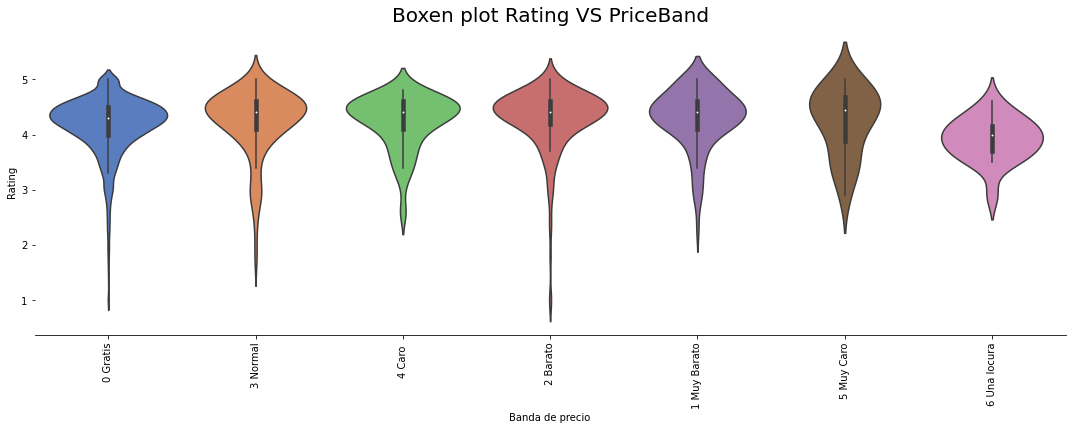

In [44]:
# Ahora en vez de utilizar 'boxplot'
g = sns.catplot(x='Banda de precio', y="Rating",
                data=google_df, 
                kind="violin", # box , violin
                height = 5,aspect=3 ,palette = "muted")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g = g.set_ylabels("Rating")
plt.title('Boxen plot Rating VS PriceBand',size = 20)
plt.show()